# Tutorial 23: Classification with ML

## PHYS 5070, Spring 2022

In [1]:
## Common import cell!

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.svm

## T23.1 - Elemental Classification

We'll get some practice on basic ML classification methods using a relatively small and simple dataset: the periodic table of elements.  In particular, we'll use the data in the CSV file `PubChemElements_all.csv`, which was obtained from https://pubchem.ncbi.nlm.nih.gov/periodic-table/#view=list.  Run the cell below to import it:

In [3]:
elem_raw = pd.read_csv('PubChemElements_all.csv')
elem_raw

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Fl,Flerovium,289.191000,NaN,[Rn]7s2 7p2 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"6, 4,2, 1, 0",Expected to be a Solid,NaN,NaN,NaN,Post-transition metal,1998
114,115,Mc,Moscovium,290.196000,NaN,[Rn]7s2 7p3 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"3, 1",Expected to be a Solid,NaN,NaN,NaN,Post-transition metal,2003
115,116,Lv,Livermorium,293.205000,NaN,[Rn]7s2 7p4 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"+4, +2, -2",Expected to be a Solid,NaN,NaN,NaN,Post-transition metal,2000
116,117,Ts,Tennessine,294.211000,NaN,[Rn]7s2 7p5 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"+5, +3, +1, -1",Expected to be a Solid,NaN,NaN,NaN,Halogen,2010


To be concrete, let's focus our classification efforts on a simple binary question: is a given element a metal, or not?  We have a pre-existing label to this effect in the `GroupBlock` column of the dataframe.  I'll give you the next few cells to do this, but if you had to do it from scratch: the procedure is to look in `GroupBlock`, identify any classification with "metal" in the name, and then use `.isin()` to flag those elements in a new `is_metal` Boolean column.

In [4]:
elem_raw.GroupBlock.unique()

array(['Nonmetal', 'Noble gas', 'Alkali metal', 'Alkaline earth metal',
       'Metalloid', 'Halogen', 'Post-transition metal',
       'Transition metal', 'Lanthanide', 'Actinide'], dtype=object)

In [7]:
elem_raw['is_metal'] = elem_raw.GroupBlock.isin(
    ['Alkali metal', 
     'Alkaline earth metal', 
     'Post-transition metal', 
     'Transition metal']
)

elem_raw

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered,is_metal
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766,False
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868,False
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817,True
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798,True
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Fl,Flerovium,289.191000,NaN,[Rn]7s2 7p2 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"6, 4,2, 1, 0",Expected to be a Solid,NaN,NaN,NaN,Post-transition metal,1998,True
114,115,Mc,Moscovium,290.196000,NaN,[Rn]7s2 7p3 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"3, 1",Expected to be a Solid,NaN,NaN,NaN,Post-transition metal,2003,True
115,116,Lv,Livermorium,293.205000,NaN,[Rn]7s2 7p4 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"+4, +2, -2",Expected to be a Solid,NaN,NaN,NaN,Post-transition metal,2000,True
116,117,Ts,Tennessine,294.211000,NaN,[Rn]7s2 7p5 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"+5, +3, +1, -1",Expected to be a Solid,NaN,NaN,NaN,Halogen,2010,False


In [8]:
assert np.sum(elem_raw.is_metal) == 61

Next, let's reduce down to a more manageable list of properties for our feature vectors.  __Run the cell below to create the dataframe `elem_feature`__ which contains only: `AtomicNumber`, `AtomicRadius`, `IonizationEnergy`, `StandardState`, `MeltingPoint`, `BoilingPoint`, `Density`, and of course `is_metal`.  It also cuts the set of elements down, ending at Radon (86) - beyond that point many of the properties we want to use as features aren't well-known.

In [9]:
elem_feature = elem_raw.loc[:85,['AtomicNumber', 'Symbol','IonizationEnergy','StandardState',
                         'MeltingPoint', 'BoilingPoint', 'Density', 'is_metal']]
elem_feature

,AtomicNumber,Symbol,IonizationEnergy,StandardState,MeltingPoint,BoilingPoint,Density,is_metal
0,1,H,13.598,Gas,13.81,20.28,0.000090,False
1,2,He,24.587,Gas,0.95,4.22,0.000179,False
2,3,Li,5.392,Solid,453.65,1615.00,0.534000,True
3,4,Be,9.323,Solid,1560.00,2744.00,1.850000,True
4,5,B,8.298,Solid,2348.00,4273.00,2.370000,False
...,...,...,...,...,...,...,...,...
81,82,Pb,7.417,Solid,600.61,2022.00,11.342000,True
82,83,Bi,7.289,Solid,544.55,1837.00,9.807000,True
83,84,Po,8.417,Solid,527.00,1235.00,9.320000,False
84,85,At,9.500,Solid,575.00,NaN,7.000000,False


### Part A

We have a bit more work to do before we can apply any machine learning algorithms.  First of all, the numerical scales for our feature vectors are very different (e.g. compare `MeltingPoint` to `Density`!)  To make our measure of distance on the feature space more consistent, let's normalize all of the numerical feature columns.

In the cell below, __rescale each of the numerical feature columns__ (so `['IonizationEnergy', 'MeltingPoint', 'BoilingPoint', 'Density']`) so that the minimum value in each column is 0, and the maximum value is 1.  You can use the `.min()` and `.max()` methods in Pandas to do this, like so:

\\[
X_{\rm norm} = \frac{X - X_{\rm min}}{X_{\rm max} - X_{\rm min}}
\\]

or use the appropriate [scikit-learn Preprocessing function](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).

In [10]:
for col_name in ['IonizationEnergy', 'MeltingPoint', 'BoilingPoint', 'Density']:
    cmin = elem_feature[col_name].min()
    cmax = elem_feature[col_name].max()
    
    elem_feature[col_name] = (elem_feature[col_name] - cmin) / (cmax - cmin)
    
elem_feature

,AtomicNumber,Symbol,IonizationEnergy,StandardState,MeltingPoint,BoilingPoint,Density,is_metal
0,1,H,0.468951,Gas,0.003365,0.002738,0.000000,False
1,2,He,1.000000,Gas,0.000000,0.000000,0.000004,False
2,3,Li,0.072392,Solid,0.118444,0.274653,0.023656,True
3,4,Be,0.262359,Solid,0.407909,0.467158,0.081964,True
4,5,B,0.212826,Solid,0.614081,0.727867,0.105003,False
...,...,...,...,...,...,...,...,...
81,82,Pb,0.170251,Solid,0.156895,0.344050,0.502523,True
82,83,Bi,0.164065,Solid,0.142227,0.312506,0.434513,True
83,84,Po,0.218576,Solid,0.137636,0.209860,0.412935,False
84,85,At,0.270913,Solid,0.150194,NaN,0.310143,False


In [11]:
import numpy.testing as npt

for col_name in ['IonizationEnergy', 'MeltingPoint', 'BoilingPoint', 'Density']:
    npt.assert_allclose(elem_feature[col_name].min(), 0)
    npt.assert_allclose(elem_feature[col_name].max(), 1)

We have one column left that isn't a number between 0 and 1: the `StandardState` column.  Let's assign a numeric value between 0 and 1 to each of the states: it doesn't matter which end is 0, but Liquid should definitely be 0.5.  You can use the Pandas `.replace()` function to quickly substitute the values using a dictionary.

In [12]:
state_subs = {
    'Gas': 0.0,
    'Liquid': 0.5,
    'Solid': 1.0,
}

elem_feature.replace({'StandardState': state_subs}, inplace=True)
elem_feature

,AtomicNumber,Symbol,IonizationEnergy,StandardState,MeltingPoint,BoilingPoint,Density,is_metal
0,1,H,0.468951,0.0,0.003365,0.002738,0.000000,False
1,2,He,1.000000,0.0,0.000000,0.000000,0.000004,False
2,3,Li,0.072392,1.0,0.118444,0.274653,0.023656,True
3,4,Be,0.262359,1.0,0.407909,0.467158,0.081964,True
4,5,B,0.212826,1.0,0.614081,0.727867,0.105003,False
...,...,...,...,...,...,...,...,...
81,82,Pb,0.170251,1.0,0.156895,0.344050,0.502523,True
82,83,Bi,0.164065,1.0,0.142227,0.312506,0.434513,True
83,84,Po,0.218576,1.0,0.137636,0.209860,0.412935,False
84,85,At,0.270913,1.0,0.150194,NaN,0.310143,False


In [13]:
assert elem_feature['StandardState'].min() == 0.0
assert elem_feature['StandardState'].max() == 1.0

Finally, let's split into a testing and training dataset.  Usually you should do this randomly to avoid introducing some systematic bias due to the way you've divided the data up, but for consistency in this example, let's use elements 1-50 as the training set and the remainder (51-86) as our testing set.  __Run the cell below__ to split up `elem_feature`.

In [14]:
features = ['IonizationEnergy','StandardState', 'MeltingPoint', 'BoilingPoint', 'Density']

elem_train = elem_feature.loc[:49,:]
elem_test = elem_feature.loc[49:,:]

### Part B

Let's begin by trying some __unsupervised learning__.  We'll use the __K-means clustering__ algorithm, which is very simple: we propose a set of $k$ means $\mu_j$, and then minimize the total distance between _clusters_ of our data points and one of the means, $\sum_{i \in C_j} |x_i - \mu_j|^2$.  (Minimization simply involves moving the locations of the means $\mu_j$ around.)  Once we've optimized the locations of the means, we label each data point according to the closest cluster.

In the cell below, __use the `sklearn.cluster.KMeans` function__ on the data in `elem_train` to obtain a clustering.  __Set the number of clusters equal to $k=2$__, since we're ultimately interested in a binary classification of metal vs. non-metal.  [See here](https://scikit-learn.org/stable/modules/clustering.html#k-means) for an overview of clustering in SKLearn, and [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for the specification of the KMeans function.  Save the output of the function to a variable called `kmeans`.

In [15]:
kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(elem_train[features])

print(kmeans.labels_)

[1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Now __use the labels on the training data__ to print the corresponding subset of `elem_train` which has been identified as cluster `1`.  (The labels are in the `kmeans.labels_` property of the KMeans output object: you will have to typecast them to Boolean with NumPy's `.asarray()` or `.astype()` methods to use them as a mask)

In [18]:
elem_train.loc[np.asarray(kmeans.labels_, bool),:]

,AtomicNumber,Symbol,IonizationEnergy,StandardState,MeltingPoint,BoilingPoint,Density,is_metal
0,1,H,0.468951,0.0,0.003365,0.002738,0.000000,False
1,2,He,1.000000,0.0,0.000000,0.000000,0.000004,False
6,7,N,0.514184,0.0,0.016274,0.012471,0.000051,False
7,8,O,0.469917,0.0,0.013974,0.014660,0.000059,False
8,9,F,0.653796,0.0,0.013757,0.013779,0.000071,False
9,10,Ne,0.853960,0.0,0.006177,0.003896,0.000036,False
16,17,Cl,0.438506,0.0,0.044662,0.040051,0.000138,False
17,18,Ar,0.573431,0.0,0.021677,0.014166,0.000075,False
34,35,Br,0.382738,0.5,0.069335,0.055881,0.137790,False
35,36,Kr,0.488378,0.0,0.030047,0.019730,0.000161,False


This clearly isn't a totally random chunk of the periodic table...most of the elements in cluster 1 are in the top right corner, plus Hydrogen.  We can learn more about how the classifier chose these labels by making some plots.  __Use `plt.scatter()` with the option `c=kmeans.labels_`__ to visualize where the clusters are located on two-dimensional plots comparing features  (try `IonizationEnergy` vs. `MeltingPoint`).

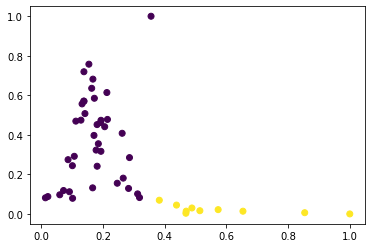

In [19]:
plt.scatter(elem_train['IonizationEnergy'], elem_train['MeltingPoint'], c=kmeans.labels_)

If you try a few different plots, you'll notice the pattern: the few elements that our k-means algorithm has clustered together all have relatively large ionization energies (and tend to be similar on the other axes as well, compared to the overall dataset.)  The algorithm has easily found a pattern that we would also have recognized if we made the plots first!

However, because this pattern is so simple, it's also not very useful.  __Try using `kmeans.predict()` on the `elem_test` dataset__, and see how well it works (or doesn't!)  

Note - you'll have to get rid of any NaNs in the dataset first, or scikit will complain!  Use the `.dropna()` method of Pandas here, or you can go back and just remove any NaN rows from `elem_test` completely.

In [21]:
pred_labels = kmeans.predict(elem_test[features].dropna())
print(pred_labels)

elem_test.dropna().loc[np.asarray(pred_labels, bool), :]

# We get back Xe and Rn; the two elements with the highest ionization energies.
# So we're still just "clustering" on a single feature, basically.

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


,AtomicNumber,Symbol,IonizationEnergy,StandardState,MeltingPoint,BoilingPoint,Density,is_metal
53,54,Xe,0.398009,0.0,0.041970,0.027420,0.000257,False
85,86,Rn,0.331078,0.0,0.052603,0.035335,0.000427,False


Before we move on, since we already have labels in this case we should make some similar plots using our `is_metal` column.  __Run the cell below__ to make some scatter plots using the training data (yellow points are metals):

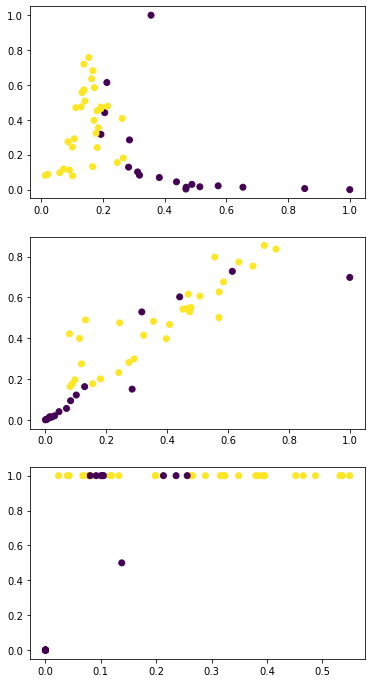

In [22]:
fig, axes = plt.subplots(3,1, figsize=(6,12))
axes[0].scatter(elem_train['IonizationEnergy'], elem_train['MeltingPoint'], c=elem_train['is_metal'])
axes[1].scatter(elem_train['MeltingPoint'], elem_train['BoilingPoint'], c=elem_train['is_metal'])
axes[2].scatter(elem_train['Density'], elem_train['StandardState'], c=elem_train['is_metal'])

You should see that metals tend to have the _lowest_ ionization energies, are always solids, and are hard to discern using melting/boiling points (although they don't have _very_ small melting or boiling points.)

### Part C

Now let's move on to __supervised learning__, which means we'll actually use the `is_metal` labels that are included in the data set.  There are several methods (like the support vector machine I tried in lecture) that will just output exact True/False labels for each point, similar to the ouput of k-means.  In this case, it's maybe more useful to have a probabilistic statement about the labels, since metals don't look like a really obvious and simple category based on our available features.


Let's try the method of __logistic regression__.  For this method, we model the probability distribution for a binary classifier (i.e. "yes" or "no") as

\\[
p(y_i = 1 | \mathbf{x}_i, \mathbf{w}) \equiv \sigma(\mathbf{x}_i^T \mathbf{w}) = \frac{1}{1 + \exp(-\mathbf{x}_i^T \mathbf{w})} 
\\]

and $p(y_i = 0) = 1 - p(y_i = 1)$.  Some jargon: here $\mathbf{x}_i$ is the __feature vector__ and $\mathbf{y}_i$ is the __label__ for the $i$-th data point.  The weights $\mathbf{w}$ define the model: a larger weight for a given component of $\mathbf{x}$ will give that feature more influence on the probability distribution.

The cost function is readily found as the log-likelihood of the whole dataset to be

\\[
C(\mathbf{w}) = -\log \prod_i P(y_i = 1)^{y_i} P(y_i = 0)^{1-y_i} \\
= -\sum_{i} \left[\mathbf{y}_i \log \sigma (\mathbf{x}_i^T \mathbf{w}) + (1-\mathbf{y}_i) \log (1 - \sigma(\mathbf{x}_i^T \mathbf{w}) ) \right].
\\]

The function $C(w)$ is sometimes called the __cross entropy__, although "cost function" or "log likelihood" are more universal labels.  In the cell below, __implement the `cross_entropy` function__ according to the specifications in the docstring.  Be careful with vector indices: there are two vector spaces at once here, the feature space and the sample space (i.e. the element number.)

(Normally, I recommend writing vectorized functions with NumPy.  This is possible here, but will be tricky due to the different indices to keep track of.  So in this one instance, because our data set is small, a `for` loop implementation is preferred.  Remember, correct and slow is better than fast and wrong!)

In [23]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def cross_entropy(x, w, y):
    """
    Compute the cross entropy, a.k.a. the log likelihood
    for the logistic regression model..
    
    Inputs:
      - x: 2d array of feature vectors, with features as columns.
      - w: 1d array of feature weights, same length as a feature vector.
      - y: 1d array of data labels, should be binary (1 or 0)
      
    Return:
      - C(w): the cross entropy.
    """
    
    y = y.astype(np.int)
    
    ### BEGIN SOLUTION
    # It's possible to do this vectorized, of course, but
    # since this is a tiny dataset we can just use for loops.
    # The vectorized code is trickier since we have to be careful
    # with how we're taking dot products.
    C = 0.

    for i in range(len(y)):
        xw = 0
        for j in range(len(w)):
            xw += x[i,j] * w[j]
            
        S = sigmoid(xw)
        C += -y[i] * np.log(S) - (1-y[i]) * np.log(1-S)
        
    return C
    ### END SOLUTION
    

In [24]:
x_test = np.array([[0,1],[1,1]])
y_test = np.array([0,1])
w_test = np.array([0.2,0.4])

npt.assert_allclose(cross_entropy(x_test, w_test, y_test), 1.35, atol=1e-2)

/var/folders/gx/lvgk06f13c91k6rl0vkl7pxc0000gn/T/ipykernel_8807/4118859125.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


Now __use a numerical optimizer__ to minimize the cross-entropy with respect to the weights `w`, over the training dataset `elem_train`.  You can use any optimizer you want; there is a stochastic gradient descent algorithm available in scikit-learn, or you can just use the standard `scipy.optimize.minimize()`.  

Remember that your optimizer will want a function _only_ depending on `w`, so you should write a "wrapper function" for the general `cross_entropy()` function that plugs in the training data.  __Save your results to a variable called `w_opt`.__

In [25]:
import scipy.optimize as opt

def CE_train(w):
    return cross_entropy(elem_train[features].values, w, elem_train['is_metal'].values)

res = opt.minimize(CE_train, [0,0,0,0,0])
w_opt = res.x
print(res)

/var/folders/gx/lvgk06f13c91k6rl0vkl7pxc0000gn/T/ipykernel_8807/4118859125.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


      fun: 6.770078261976061
 hess_inv: array([[ 530.25229493, -155.01397128,  -95.34449071,  149.51538609,
          26.03150581],
       [-155.01397128,   51.42190257,   21.67139887,  -45.39947548,
         -20.04540045],
       [ -95.34449071,   21.67139887,   71.22826853,  -58.04124258,
          -1.33889134],
       [ 149.51538609,  -45.39947548,  -58.04124258,   70.39350323,
          10.58303384],
       [  26.03150581,  -20.04540045,   -1.33889134,   10.58303384,
          43.67021777]])
      jac: array([1.43051147e-06, 5.06639481e-06, 1.49011612e-06, 1.25169754e-06,
       1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 210
      nit: 34
     njev: 35
   status: 0
  success: True
        x: array([-48.57139624,  11.03743503,   7.46983423, -10.41765591,
         9.74002512])


Now let's see how the classifier performs!  First, a check on the training data: __run the cells below__ to add a `p_metal` column to `elem_train` giving the probability each row is a metal (according to the optimized logisitic regression), and then make a plot.  You should see fairly good performance: most (but not all) metals have a probability near 1, and few of the non-metals have a high probability.  (This isn't perfect, because we have assumed a fairly simple linear form in our model.)

In [26]:
elem_train['p_metal'] = sigmoid(np.sum(elem_train[features].values * w_opt, axis=1))

/var/folders/gx/lvgk06f13c91k6rl0vkl7pxc0000gn/T/ipykernel_8807/1917252900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_train['p_metal'] = sigmoid(np.sum(elem_train[features].values * w_opt, axis=1))


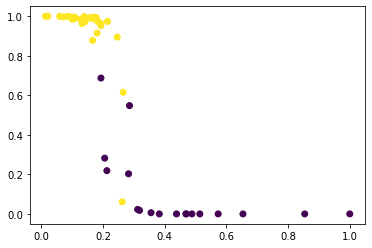

In [27]:
plt.scatter(elem_train['IonizationEnergy'], elem_train['p_metal'], c=elem_train['is_metal'])

Now __make the same plot on the testing set__, and see how your classifier does out of sample!

/var/folders/gx/lvgk06f13c91k6rl0vkl7pxc0000gn/T/ipykernel_8807/2699113710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_test_final['p_metal'] = sigmoid(np.sum(elem_test[features].dropna().values * w_opt, axis=1))


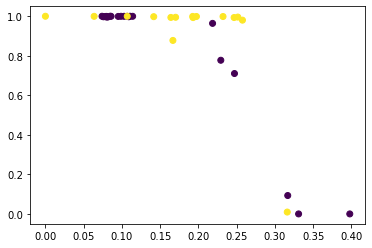

In [28]:
elem_test_final = elem_test.dropna()
elem_test_final['p_metal'] = sigmoid(np.sum(elem_test[features].dropna().values * w_opt, axis=1))

plt.scatter(elem_test_final['IonizationEnergy'], elem_test_final['p_metal'], c=elem_test_final['is_metal'])

Let's be more quantitative: compute the __false positive rate__ (number of non-metals incorrectly labelled as metals, divided by the total number of elements) and __false negative rate__ (metals labelled as non-metals).  

Normally for a probabilistic method we would have to pick a threshold, but in this case we see a large gap between high and low probabilities; we can just cut at $p > 0.5$ for an unambiguous division.

In [29]:
false_positive = np.sum(~elem_test_final[elem_test_final['p_metal'] > 0.5]['is_metal']) / len(elem_test_final) 
false_negative = np.sum(elem_test_final[elem_test_final['p_metal'] < 0.5]['is_metal']) / len(elem_test_final) 

print("False positive rate: ", false_positive)
print("False negative rate: ", false_negative)

False positive rate:  0.5
False negative rate:  0.027777777777777776


You should see not-so-great performance in terms of false positives!  My suspicion is that we're probably overfitting the ionization energy, which has some structure not related to metals as we saw in the k-means exercise.  Perhaps a more sophisticated model than logistic regression would do better with a small number of features.  Either way, the lesson here is to __always test__ when you're doing machine learning, because this looked deceptively good on the training set!